In [149]:
import augs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

with open('filenames.json') as rf:
    file_loc = json.load(rf)['file_loc']
augmentation = augs.Wiggle()

In [150]:
def plot_maps(param):
    fig, ax = plt.subplots(5,5, figsize=[10,10])
    fig.tight_layout()
    fig.suptitle('Intensity mappings, jitter parameter = %i' % param, y = 1.03)
    for nm, i in enumerate(np.ravel(ax)):
        i.axis('off')
        '''if nm >= 50:
            i.set_xlabel("input")
        if nm % 10 == 0:
            i.set_ylabel("output")'''
        mp = augmentation.wiggle_map(param)
        i.plot(np.arange(256), mp)

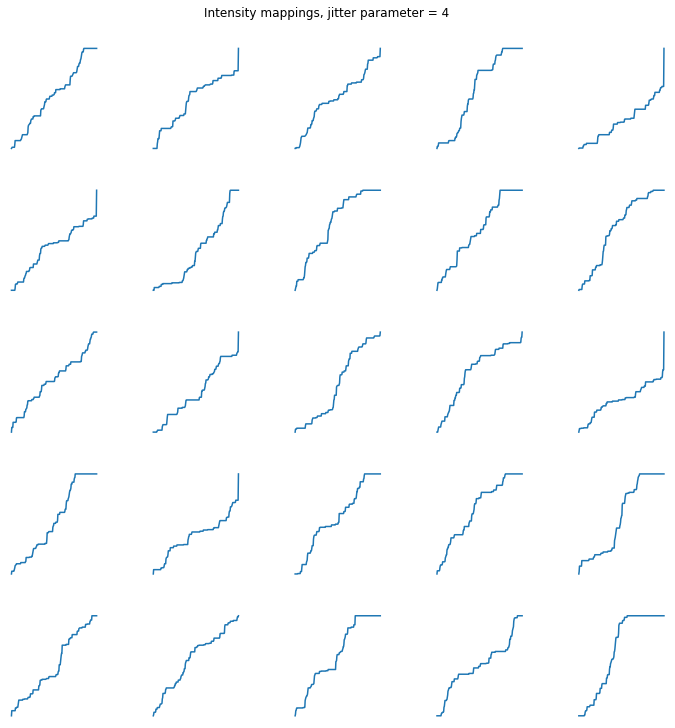

In [151]:
plot_maps(4)

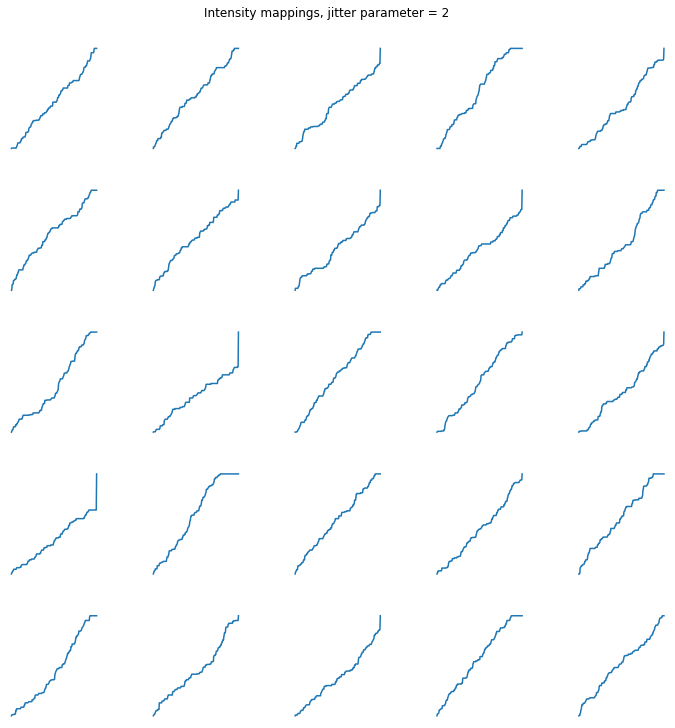

In [152]:
plot_maps(2)

In [4]:
def plot_images_kaist(param):
    # names = ['00001', '01002', '02003', '03004']
    names = ['set00_V001_lwir_I01687',
             'set00_V002_lwir_I00393',
             'set00_V003_lwir_I00709',
             'set00_V005_lwir_I01131']
    x, out1, out2, out3, diff1, diff2, diff3 = [], [], [], [], [], [], []
    for i, navn in enumerate(names):
        x.append(cv2.imread(file_loc % navn))
        out1.append(augmentation(x[i], param))
        out2.append(augmentation(x[i], param))
        out3.append(augmentation(x[i], param))
    
    figs, axs = plt.subplots(4, 4, figsize=[18, 14])
    figs.tight_layout()
    [a.axis('off') for a in np.ravel(axs)]
    # figs.tight_layout()
    figs.suptitle('Mono-Augmentation, jitter parameter = %i' % param, size='xx-large', y=1.03)
    for i, navn in enumerate(names):
        axs[i, 0].set_title('KAIST_' + navn + ' original')
        axs[i, 0].imshow(x[i])
        diff1.append(np.amax(np.abs(x[i] - out1[i])))
        axs[i, 1].set_title('Adjusted, max(new - original) = %i' % diff1[i])
        axs[i, 1].imshow(out1[i])
        diff2.append(np.amax(np.abs(x[i] - out2[i])))
        axs[i, 2].set_title('Adjusted, max(new - original) = %i' % diff2[i])
        axs[i, 2].imshow(out2[i])
        diff3.append(np.amax(np.abs(x[i] - out3[i])))
        axs[i, 3].set_title('Adjusted, max(new - original) = %i' % diff3[i])
        axs[i, 3].imshow(out3[i])

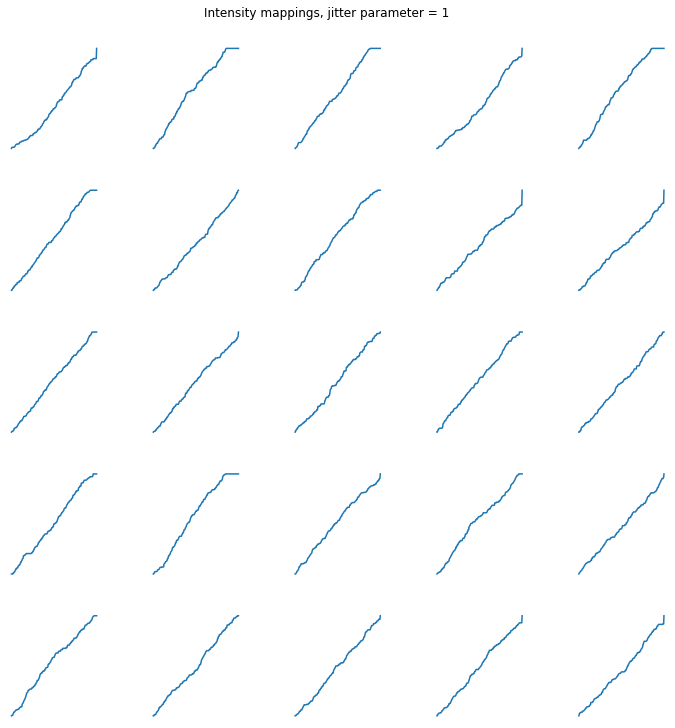

In [153]:
plot_maps(1)

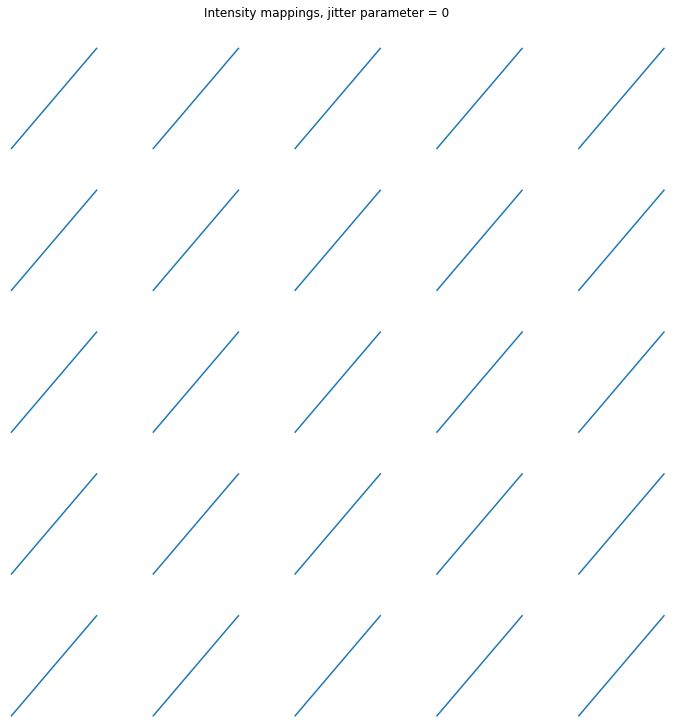

In [154]:
plot_maps(0)

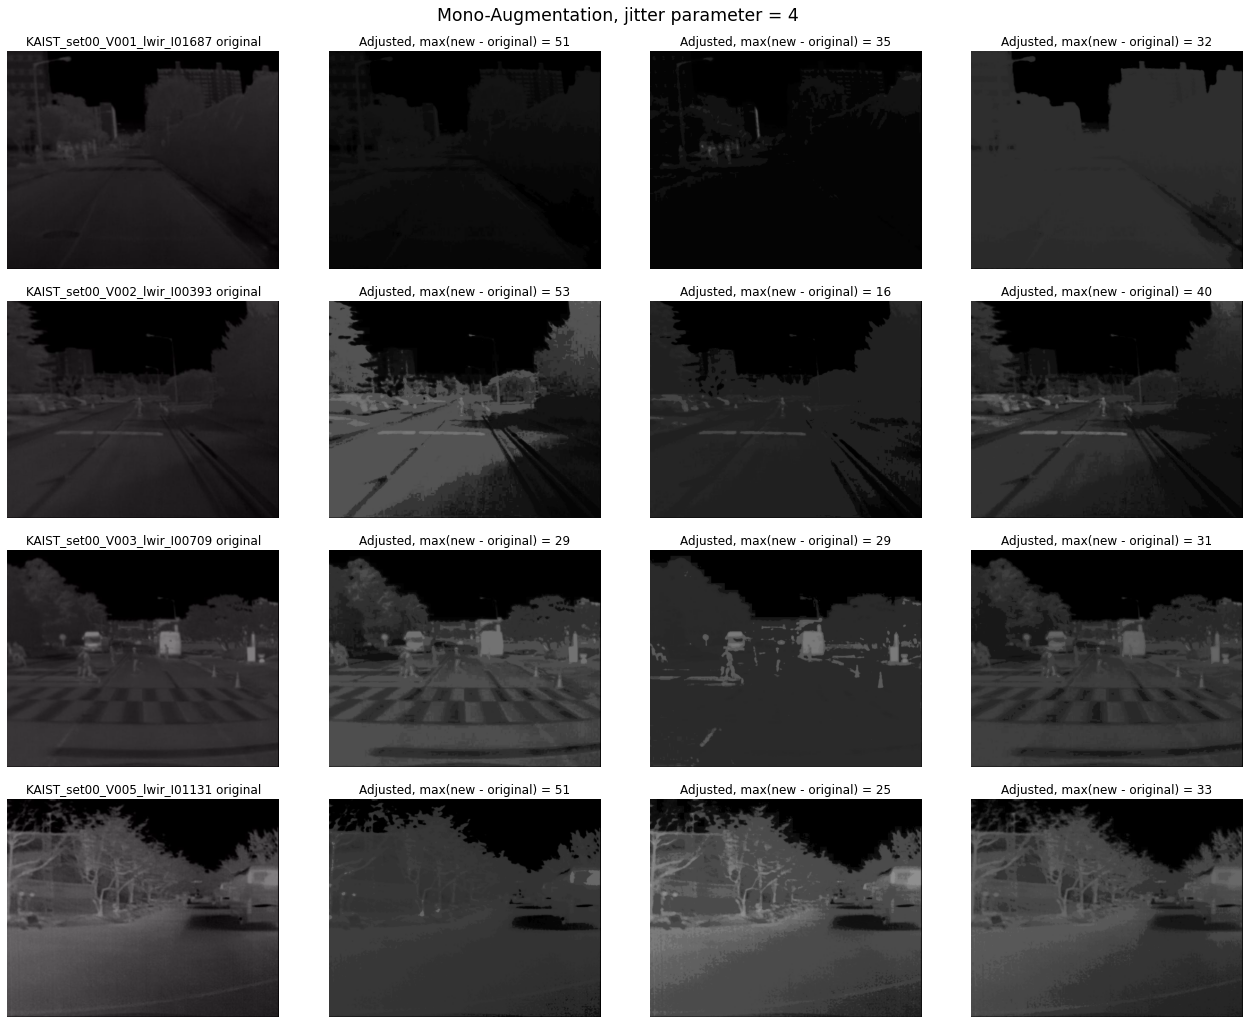

In [155]:
plot_images_kaist(4)

In [136]:
def plot_distribution(i, dev, ax=None):
    samples = np.zeros(10000)
    for ss in range(len(samples)):
        sample =  np.around(np.random.laplace(1, dev, i)).astype(int)
        for j in range(len(sample)):
            if sample[j] < 0:
                try:
                    for p in range(-sample[j]): sample[j+p] = 0
                except IndexError:
                    pass
                j -= sample[j]
        samples[ss] = np.sum(sample)
    samples[samples > 255] = 255
    if ax is not None:
        ax.set_title('output dist., input = %i' % i)
        ax.set_xlim(-1, 256)
        ax.get_yaxis().set_visible(False)
        ax.hist(samples, bins=65, density=True)
    else:
        return samples

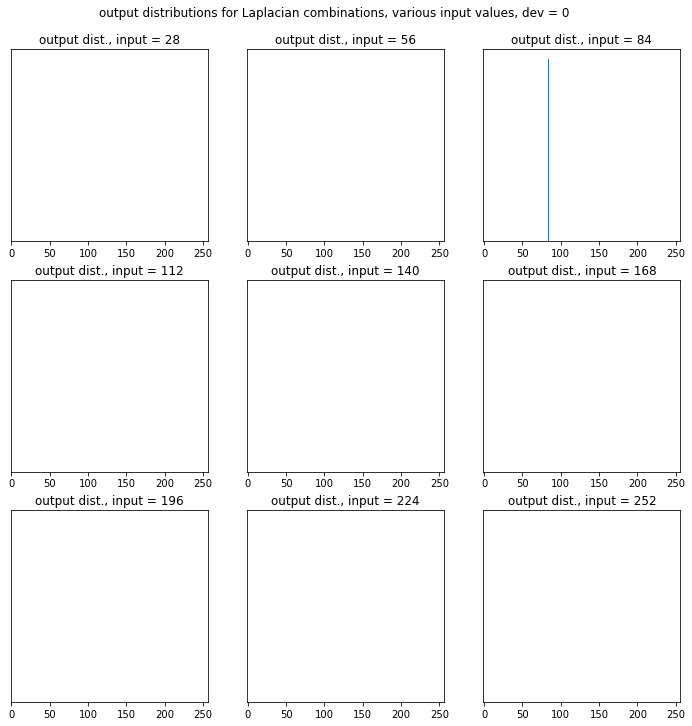

In [143]:
fig, ax = plt.subplots(3, 3, figsize=[12, 12])
fig.suptitle('output distributions for Laplacian combinations, various input values, dev = %i' % 0, y=0.93)
# fig.tight_layout()
for i, a in enumerate(np.ravel(ax)): plot_distribution(28*(i+1), 0, a)

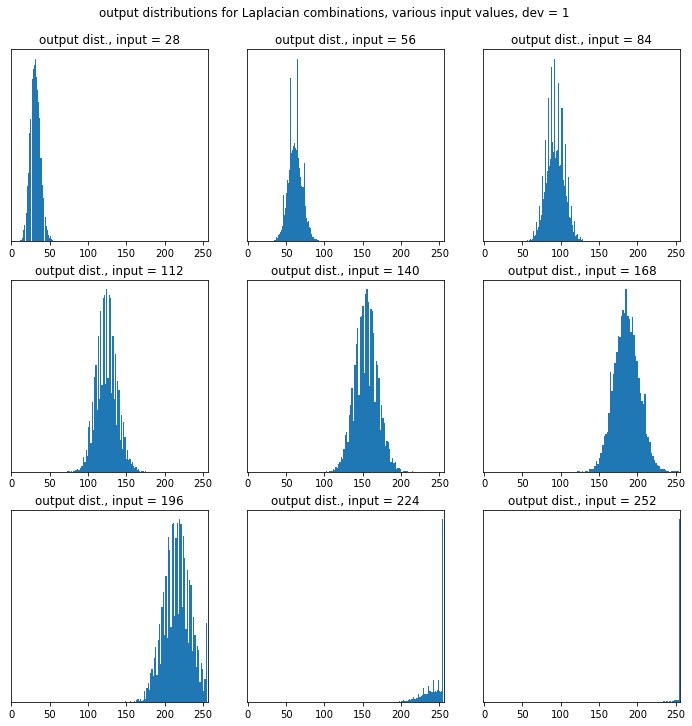

In [144]:
fig, ax = plt.subplots(3, 3, figsize=[12, 12])
fig.suptitle('output distributions for Laplacian combinations, various input values, dev = %i' % 1, y=0.93)
# fig.tight_layout()
for i, a in enumerate(np.ravel(ax)): plot_distribution(28*(i+1), 1, a)

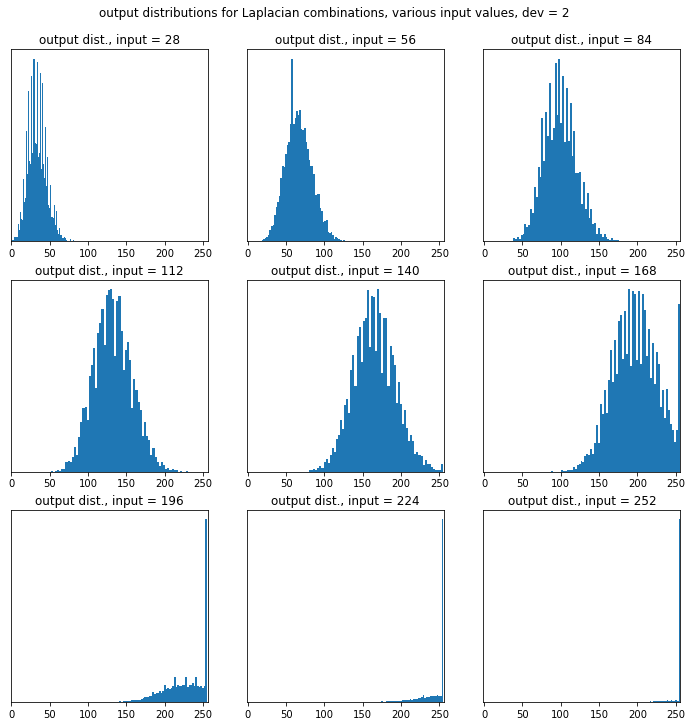

In [147]:
fig, ax = plt.subplots(3, 3, figsize=[12, 12])
fig.suptitle('output distributions for Laplacian combinations, various input values, dev = %i' % 2, y=0.93)
# fig.tight_layout()
for i, a in enumerate(np.ravel(ax)): plot_distribution(28*(i+1), 2, a)

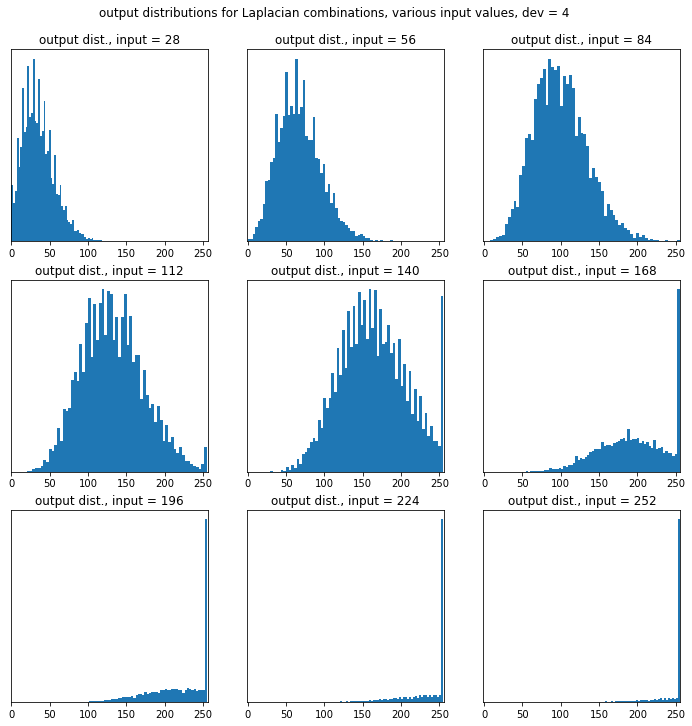

In [146]:
fig, ax = plt.subplots(3, 3, figsize=[12, 12])
fig.suptitle('output distributions for Laplacian combinations, various input values, dev = %i' % 4, y=0.93)
for i, a in enumerate(np.ravel(ax)): plot_distribution(28*(i+1), 4, a)

In [78]:
from tqdm import tqdm
dists = []
for i in tqdm(range(256)):
    dists.append(plot_distribution(i, 0))

100%|██████████| 256/256 [03:37<00:00,  1.18it/s]


In [79]:
np.save('dists/dists0.npy', dists)

devs = [1, 2, 4]

for dev in devs:
    dists1 = []
    for i in tqdm(range(256)):
        dists1.append(plot_distribution(i, dev))
    np.save('dists/dists%i.npy' % dev, dists1)

100%|██████████| 256/256 [05:13<00:00,  1.22s/it]


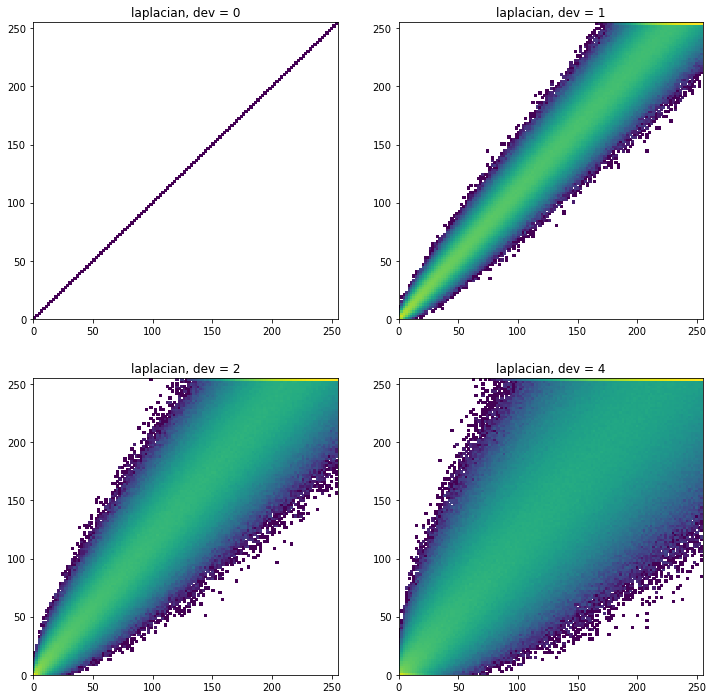

In [148]:
dists = np.load('dists/dists2.npy')
xax   = np.concatenate([(i) * np.ones(10000) for i in range(256)])
import matplotlib.colors as colors
fig2, ax2 = plt.subplots(2, 2, figsize=[12, 12])
dists = [np.load('dists/dists0.npy'), 
         np.load('dists/dists1.npy'), 
         np.load('dists/dists2.npy'), 
         np.load('dists/dists4.npy')]
names = ['laplacian, dev = %i' % n for n in [0, 1, 2, 4]]
a = np.ravel(ax2)
for i in range(len(dists)):
    x = np.ravel(dists[i])
    a[i].set_title(names[i])
    a[i].hist2d(xax, x, bins=128, norm=colors.LogNorm())